In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Modeling Evaluation
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Pipeline
from imblearn.pipeline import make_pipeline

from operator import itemgetter

import os

#%matplotlib inline 
#import mpld3

%load_ext autoreload
%autoreload 2

In [2]:
sns.set(context = 'notebook', style = 'whitegrid')
ppt_colors = ['#9146ff', '#571dad', '#9168cd', '#bd9eeb', '#b58eee', '#b48bf0']

In [3]:
raw_data_path = os.path.join(os.pardir, os.pardir, "data", "raw", "twitchdata-update.csv")
df_twitch = pd.read_csv(raw_data_path)

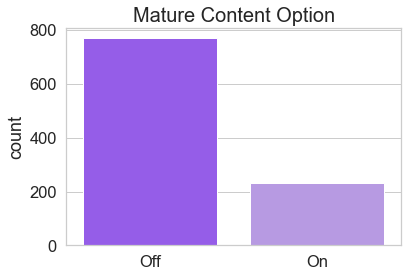

In [4]:
# Mature content or Not

sns.set(context = 'notebook', style = 'whitegrid', font_scale = 1.5)

ax = sns.countplot(x = 'Mature', data = df_twitch, palette = [ppt_colors[0], ppt_colors[4]])
ax.set(xlabel = '', xticklabels = ['Off', 'On'])
ax.set_title('Mature Content Option', fontdict={'fontsize': 20})

plt.savefig('../../reports/figures/Mature.png', dpi = 500, bbox_inches = 'tight', transparent = True)
plt.show()

In [5]:
df_twitch.Mature.value_counts()

False    770
True     230
Name: Mature, dtype: int64

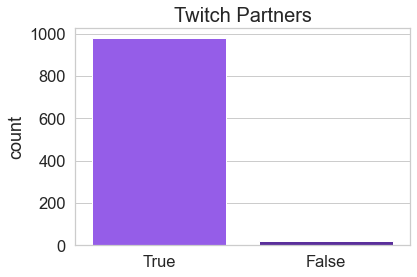

In [6]:
# Partnered or Not

sns.set(context = 'notebook', style = 'whitegrid', font_scale = 1.5)

ax = sns.countplot(x = 'Partnered', data = df_twitch, palette = [ppt_colors[0], ppt_colors[1]], order = df_twitch['Partnered'].value_counts().index)
ax.set(xlabel = '', xticklabels = ['True', 'False'])
ax.set_title('Twitch Partners', fontdict={'fontsize': 20})

plt.savefig('../../reports/figures/Partnered.png', dpi = 500, bbox_inches = 'tight', transparent = True)
plt.show()

In [7]:
df_twitch.Partnered.value_counts()

True     978
False     22
Name: Partnered, dtype: int64

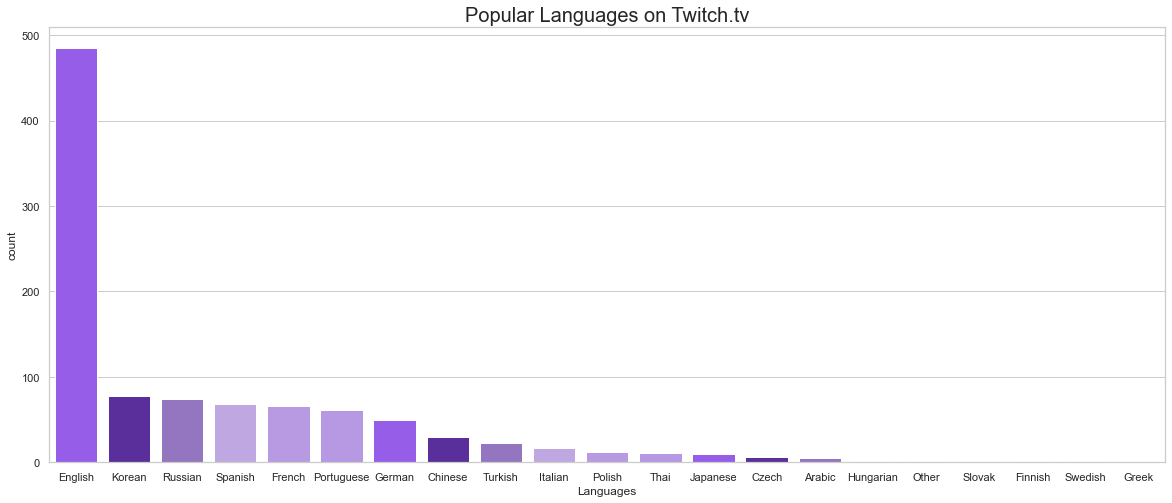

In [8]:
# Language breakdown
plt.figure(figsize=(20, 8))
sns.set(context = 'notebook', style = 'whitegrid', font_scale = 1)
xlabel = 'Languages'
ylabel = 'count'

ax = sns.countplot(x = 'Language', data = df_twitch, order = df_twitch['Language'].value_counts().index, palette = ppt_colors)
ax.set(xlabel = xlabel, ylabel = ylabel)
ax.set_title('Popular Languages on Twitch.tv', fontdict={'fontsize': 20})

plt.savefig('../../reports/figures/Languages.png', dpi = 500, bbox_inches = 'tight', transparent = True)
plt.show()

In [9]:
df_twitch.Language.value_counts()

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Other           1
Slovak          1
Finnish         1
Swedish         1
Greek           1
Name: Language, dtype: int64

In [10]:
Partnered_le = df_twitch.Partnered

le = LabelEncoder()
le.fit(Partnered_le)
df_twitch.Partnered = le.transform(Partnered_le)
df_twitch.Partnered

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Partnered, Length: 1000, dtype: int64

In [11]:
Mature_le = df_twitch.Mature

le = LabelEncoder()
le.fit(Mature_le)
df_twitch.Mature = le.transform(Mature_le)
df_twitch.Mature

0      0
1      0
2      1
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Mature, Length: 1000, dtype: int64

In [12]:
Language_le = df_twitch.Language

le = LabelEncoder()
le.fit(Language_le)
df_twitch.Language = le.transform(Language_le)
df_twitch.Language

0       3
1       3
2      14
3       3
4       3
       ..
995    17
996    11
997    11
998     3
999     5
Name: Language, Length: 1000, dtype: int64

In [13]:
df_twitch.set_index('Channel', drop=True, inplace=True)
df_twitch.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Channel,,,,,,,,,,
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,3
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,3
Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,14
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,3
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,3


In [14]:
df_twitch_drop = df_twitch[df_twitch['Followers gained'] < 200].index
df_twitch_drop

Index(['Amaz', 'TSM_TheOddOne', 'Dyrus', '마스카 (newmasca)'], dtype='object', name='Channel')

In [15]:
df_twitch = df_twitch.drop(df_twitch_drop)


In [16]:
df_twitch

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Channel,,,,,,,,,,
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,3
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,3
Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,14
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,3
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,3
...,...,...,...,...,...,...,...,...,...,...
Destructoid,122628630,103020,14566,1190,48007,8995,87603521,1,0,3
LITkillah,122524635,13560,21359,9104,601927,562691,2162107,1,0,17
빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,1,0,11


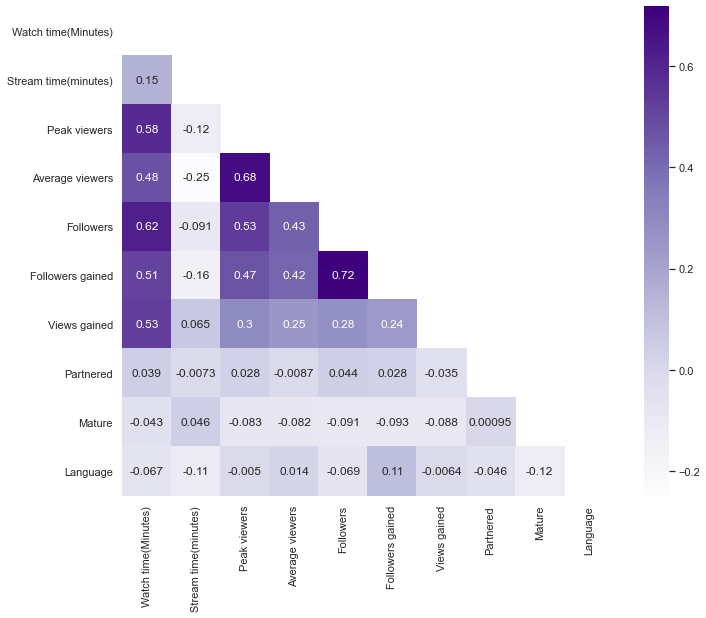

In [17]:
corr = df_twitch.corr()
#corr.style.background_gradient()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True, mask=mask, ax=ax1, cmap="Purples");


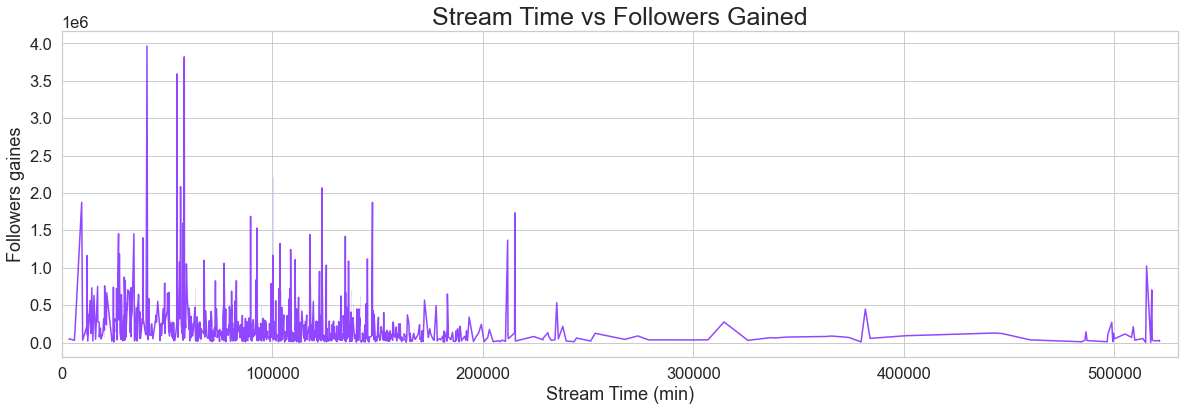

In [18]:
# Line plot
plt.figure(figsize=(20, 6))
sns.set(context = 'notebook', style = 'whitegrid', font_scale = 1.5)

line = sns.lineplot(x='Stream time(minutes)', y='Followers gained', data=df_twitch,  color = "#9146ff")
line.set(xlabel='Stream Time (min)', ylabel='Followers gaines')
line.set_title('Stream Time vs Followers Gained', fontdict={'fontsize': 25})
plt.xlim(left=0, right=5.3e5)

plt.savefig("../../reports/figures/StreamTimevsFollowersgained.png", bbox_inches='tight', dpi=500)

[Text(0.5, 0, 'Watch time'),
 Text(0, 0.5, 'Followers gained'),
 Text(0.5, 1.0, 'Average viewers vs Followers Gained Corr')]

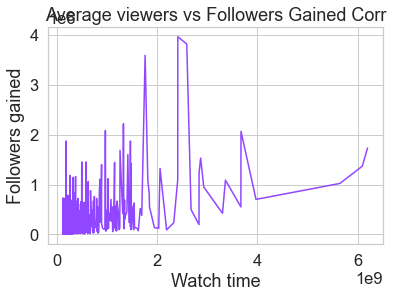

In [19]:
scat2 = sns.lineplot(x='Watch time(Minutes)', y='Followers gained', data=df_twitch,  color = "#9146ff")
scat2.set(xlabel='Watch time', ylabel='Followers gained', title='Average viewers vs Followers Gained Corr')

#plt.savefig("../../reports/figures/LikesvsMaxLiveView.png", bbox_inches='tight', dpi=500)

In [20]:
# Separating target from features

X = df_twitch.drop(['Followers gained'], axis=1)
y = df_twitch['Followers gained']

In [21]:
y_df = y.sort_values(ascending = False)
y_df

Channel
auronplay              3966525
Rubius                 3820532
TheGrefg               3593081
Bugha                  2220765
pokimane               2085831
                        ...   
Fairlight_Excalibur       5162
貝克 (slrabbit99)           2495
livekiss                  2447
MANvsGAME                 2336
voicetv                   1328
Name: Followers gained, Length: 996, dtype: int64

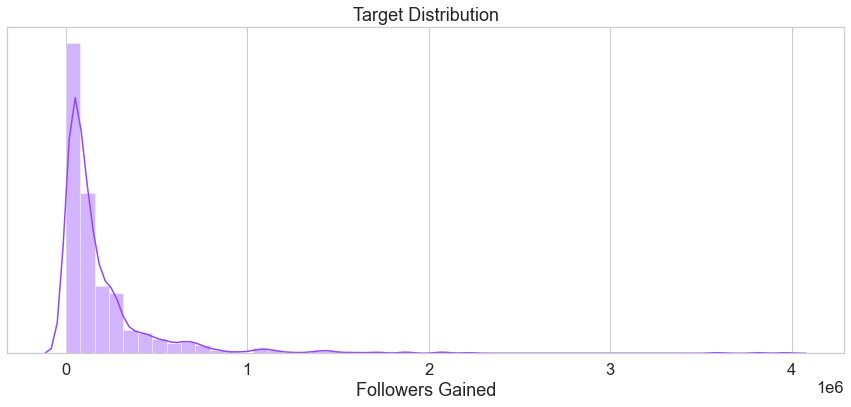

In [22]:
# Plot Target Distribution
plt.figure(figsize=(15, 6))
sns.set(context = 'notebook', style = 'whitegrid', font_scale = 1.5)

target_dist = sns.distplot(y, color = "#9146ff")
target_dist.set(xlabel='Followers Gained', title='Target Distribution', yticks=[])

plt.savefig("../../reports/figures/Target_Dist.png", bbox_inches='tight', dpi=500)

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.25)

In [120]:
type(X_t)

pandas.core.frame.DataFrame

In [118]:
df_train = X_train.merge(y_train, on='Channel')

In [119]:
df_test = X_test.merge(y_test, on='Channel')

In [120]:
df_t1 = X_t.merge(y_t, on='Channel')

In [94]:
ss = StandardScaler()
ss.fit(X_train)
X_t_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [26]:
def mean_absolute_percentage_error(y_true, y_pred): 
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# FSM: Linear Regression

In [27]:
fsm = LinearRegression()

fsm.fit(X_train, y_train)

y_pred_lr = fsm.predict(X_train)
#y_pred_lr

In [28]:
y_pred_lr = fsm.predict(X_train)

In [29]:
fsm.score(X_train, y_train)

0.6011172309390662

In [30]:
mean_absolute_percentage_error(y_train, y_pred_lr)

141.57946244814957

### Random Forest 

In [31]:
rfr = RandomForestRegressor()

In [32]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
# Define the parameter grid
grid = {
    'n_estimators': [100, 1000],
    'max_features': ["auto", "sqrt", "log2"],
    'max_depth': [3, 5, 10],
    #'criterion' : ["mse", "mae"]
    
}

In [33]:
# Initialize the gridsearch object with three-fold cross-validation
gs = GridSearchCV(rfr, grid, cv=3)

In [34]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 1000]})

In [35]:
gs.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}

In [36]:
gs.best_params_['n_estimators']

100

In [37]:
gs.best_score_

0.48633415649001005

In [38]:
y_pred_gs = gs.predict(X_train)
mean_absolute_percentage_error(y_train, y_pred_gs)

69.43083226485243

In [68]:
mean_absolute_percentage_error(y_t, y_pred_gs)

119.55682687539735

In [39]:
x1 = (y_train - y_pred_gs) / y_train

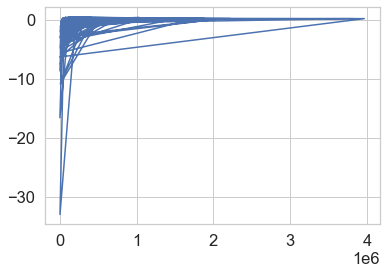

In [40]:
plt.plot(y_train, x1)

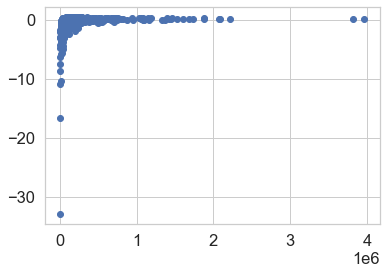

In [41]:
scatplot = plt.scatter(y_train, x1)
scatplot

In [42]:
rfr_final = RandomForestRegressor(n_estimators=gs.best_params_['n_estimators'], random_state=42, max_features=gs.best_params_['max_features'], max_depth=gs.best_params_['max_depth'])

In [43]:
rfr_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', random_state=42)

In [44]:
rfr_final.score(X_train, y_train)

0.943656321862241

In [45]:
y_pred_rf = rfr_final.predict(X_train)

In [46]:
mean_absolute_percentage_error(y_train, y_pred_rf)

68.24707634430666

In [47]:
rfr_final.score(X_val, y_val)

0.9223179359402509

In [48]:
# Cross-validation
scores = cross_val_score(rfr, X_train, y_train, cv=5).mean()
scores

0.5572312957892034

In [49]:
# Feature importance
rfr_final.feature_importances_

array([0.13627344, 0.06481242, 0.13727274, 0.18912044, 0.34465005,
       0.06117782, 0.00169315, 0.00353415, 0.06146577])

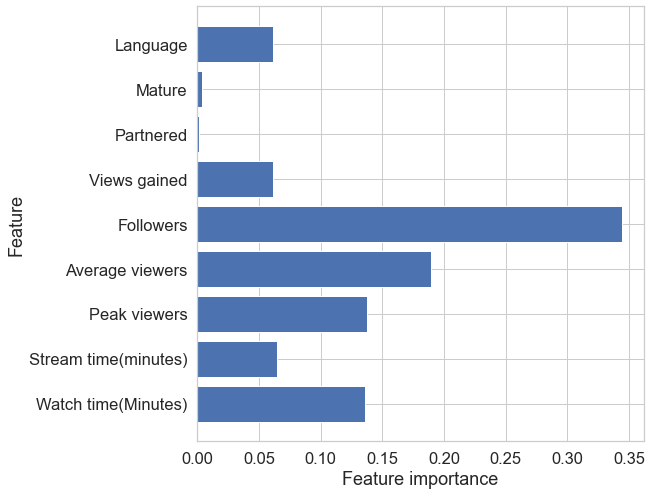

In [50]:
def plot_feature_importances(model):
    n_features = X_t.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rfr_final)

In [51]:
rfr_summary = list(zip(X_train.columns, rfr_final.feature_importances_))
rfr_summary = sorted(rfr_summary,key=itemgetter(1), reverse=True)
rfr_summary

[('Followers', 0.3446500508759361),
 ('Average viewers', 0.1891204449433026),
 ('Peak viewers', 0.13727274379293405),
 ('Watch time(Minutes)', 0.13627343875064654),
 ('Stream time(minutes)', 0.06481241685186195),
 ('Language', 0.06146577272265835),
 ('Views gained', 0.061177824711258134),
 ('Mature', 0.0035341533136490516),
 ('Partnered', 0.0016931540377533834)]

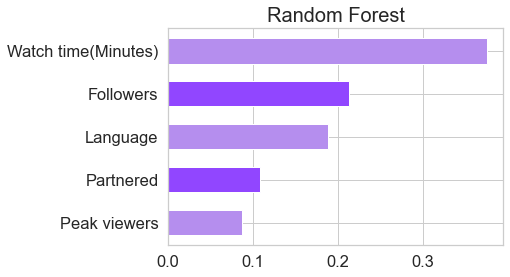

In [114]:
rfr_ylabel = [i[0] for i in rfr_summary][:5]
rfr_xlabel = [i[1] for i in rfr_summary][:5]
fig, ax = plt.subplots()

ax.barh(rfr_ylabel, rfr_xlabel, height=0.6, color=[ppt_colors[4], ppt_colors[0]])
ax.invert_yaxis()

ax.axes.set_title('Random Forest', fontsize=20)


plt.savefig("../../reports/figures/RF_5_feature_importances.png", bbox_inches='tight', dpi=400)

### Poisson Regressor

In [57]:
pr = PoissonRegressor(max_iter=1000)

In [266]:
y_train_df = y_train.sort_values(ascending = True)
y_train_df

Channel
voicetv               1328
MANvsGAME             2336
貝克 (slrabbit99)       2495
BlackFIreIce          6130
itmeJP                6134
                    ...   
Tfue               2068424
pokimane           2085831
Bugha              2220765
Rubius             3820532
auronplay          3966525
Name: Followers gained, Length: 747, dtype: int64

In [184]:
index_name = y_train_df[y_train_df.values == -4942].index
index_name

Index([], dtype='object', name='Channel')

In [180]:
y_train = y_train_df.drop(y_train_df[y_train_df.values == -4942].index, inplace = True)
y_train

In [181]:
y_train

In [60]:
pr.fit(X_t_ss, y_train)

PoissonRegressor(max_iter=1000)

In [95]:
pr.fit(X_test_ss, y_test)

PoissonRegressor(max_iter=1000)

In [68]:
y_pred_pr = pr.predict(X_t_ss)

In [62]:
pr.score(X_t_ss, y_train)

0.559705232546283

In [96]:
y_pred_pr1 = pr.predict(X_test_ss)

In [98]:
pr.score(X_test_ss, y_test)

0.5057687130606446

In [70]:
mean_absolute_percentage_error(y_train, y_pred_pr)

191.10383368421347

In [99]:
mean_absolute_percentage_error(y_test, y_pred_pr1)

169.4819522229862

In [108]:
pr.coef_

array([ 0.37513949, -0.3713011 ,  0.08705404, -0.13643353,  0.2122797 ,
       -0.10348411,  0.10776351, -0.07964111,  0.18795188])

In [111]:
rfr_summary = list(zip(X_train.columns, pr.coef_))
rfr_summary = sorted(rfr_summary,key=itemgetter(1), reverse=True)
rfr_summary

[('Watch time(Minutes)', 0.37513949136072927),
 ('Followers', 0.21227970298127583),
 ('Language', 0.1879518785872468),
 ('Partnered', 0.10776351222678783),
 ('Peak viewers', 0.08705403696951843),
 ('Mature', -0.0796411131690612),
 ('Views gained', -0.10348410732913496),
 ('Average viewers', -0.13643353478549786),
 ('Stream time(minutes)', -0.37130109975050096)]

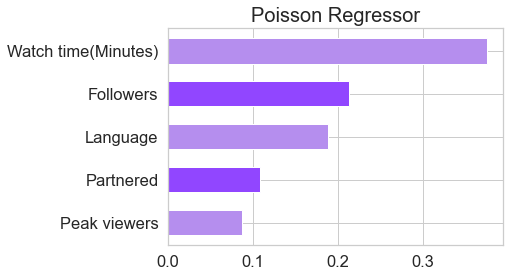

In [113]:
pr_ylabel = [i[0] for i in rfr_summary][:5]
pr_xlabel = [i[1] for i in rfr_summary][:5]
fig, ax = plt.subplots()

ax.barh(pr_ylabel, pr_xlabel, height=0.6, color=[ppt_colors[4], ppt_colors[0]])
ax.invert_yaxis()

ax.axes.set_title('Poisson Regressor', fontsize=20)


plt.savefig("../../reports/figures/PR_5_feature_importances.png", bbox_inches='tight', dpi=400)

### K Neighbors Regressor

In [63]:
knr = KNeighborsRegressor(n_neighbors=5)

In [64]:
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [65]:
knr.score(X_train, y_train)

0.44095403101601893

In [66]:
y_pred_knr = knr.predict(X_train)

In [67]:
mean_absolute_percentage_error(y_train, y_pred_knr)

177.01607171995423

Text(0, 0.5, 'Followers Gained')

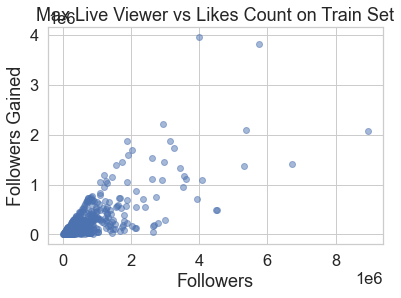

In [71]:
plt.scatter(X_train['Followers'], y_train, alpha=0.5)
plt.title('Max Live Viewer vs Likes Count on Train Set')
plt.xlabel('Followers')
plt.ylabel('Followers Gained')
#plt.ylim(bottom = 0, top=5000)
#plt.xlim(left = 0, right=200)

#plt.savefig("../../reports/figures/RF_MaxLiveViewvsLikes.png", bbox_inches='tight', dpi=400)

In [ ]:
plt.scatter(X_train['Followers'], y_train, alpha=0.5)
plt.title('Max Live Viewer vs Likes Count on Train Set')
plt.xlabel('Followers')
plt.ylabel('Followers Gained')
#plt.ylim(bottom = 0, top=5000)
#plt.xlim(left = 0, right=200)

#plt.savefig("../../reports/figures/RF_MaxLiveViewvsLikes.png", bbox_inches='tight', dpi=400)

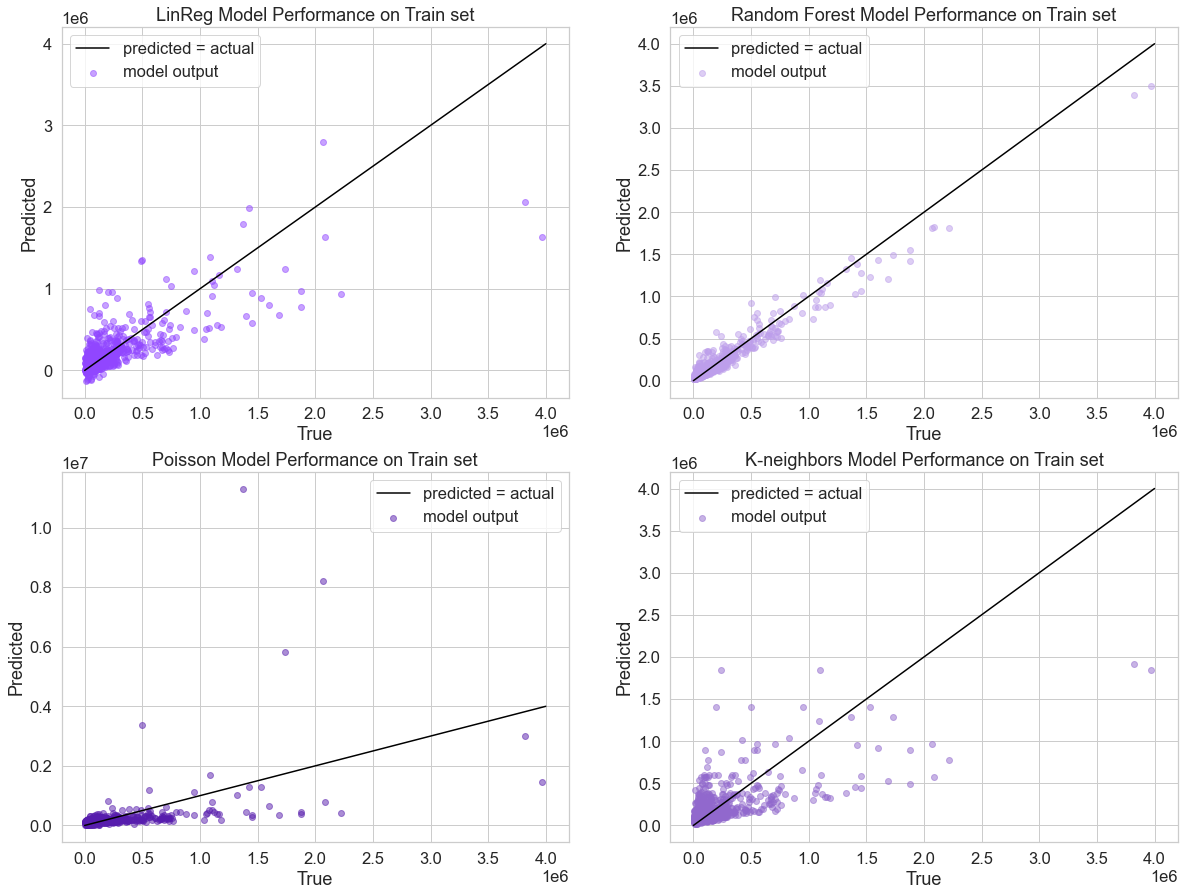

In [105]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Customize which model is actually being plotted
ax1.set_title("LinReg Model Performance on Train set")
ax1.scatter(y_train, fsm.predict(X_train),
                alpha=0.5, label="model output", color=ppt_colors[0])

ax2.set_title("Random Forest Model Performance on Train set")
ax2.scatter(y_train, rfr_final.predict(X_train),
                alpha=0.5, label="model output", color=ppt_colors[3])

ax3.set_title("Poisson Model Performance on Train set")
ax3.scatter(y_train, pr.predict(X_t_ss),
                alpha=0.5, label="model output", color=ppt_colors[1])

ax4.set_title("K-neighbors Model Performance on Train set")
ax4.scatter(y_train, knr.predict(X_train),
                alpha=0.5, label="model output", color=ppt_colors[2])

# Same setup for both plots (x and y labels, line showing y=x)
y_equals_x = np.linspace(0, 4e6)
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel("True")
    ax.set_ylabel("Predicted")
    ax.plot(y_equals_x, y_equals_x, label="predicted = actual", color="black")
    ax.legend()

plt.savefig("../../reports/figures/Models_performances.png", bbox_inches='tight', dpi=400)

In [87]:
def plot_obs_pred(df, feature, weight, true, predicted, y_label=None,
                  title=None, ax=None, fill_legend=False):
    """Plot observed and predicted - aggregated per feature level.

    Parameters
    ----------
    df : DataFrame
        input data
    feature: str
        a column name of df for the feature to be plotted
    weight : str
        column name of df with the values of weights or exposure
    observed : str
        a column name of df with the observed target
    predicted : DataFrame
        a dataframe, with the same index as df, with the predicted target
    fill_legend : bool, default=False
        whether to show fill_between legend
    """
    # aggregate observed and predicted variables by feature level
    df_ = df.loc[:, [feature, weight]].copy()
    df_["true"] = df[true] * df[weight]
    df_["predicted"] = predicted * df[weight]
    df_ = (
        df_.groupby([feature])[[weight, "true", "predicted"]]
        .sum()
        .assign(true=lambda x: x["true"] / x[weight])
        .assign(predicted=lambda x: x["predicted"] / x[weight])
    )

    ax = df_.loc[:, ["true", "predicted"]].plot(style=".", ax=ax, color=['#10061d', '#6c72e9'])
    y_max = df_.loc[:, ["true", "predicted"]].values.max() * 0.8
    p2 = ax.fill_between(
        df_.index,
        0,
        y_max * df_[weight] / df_[weight].values.max(),
        color='#9146ff',
        alpha=0.3,
    )
    if fill_legend:
        ax.legend([p2], ["{} distribution".format(feature)])
    ax.set(
        ylabel=y_label if y_label is not None else None,
        title=title if title is not None else "Train: True vs Predicted",
    )

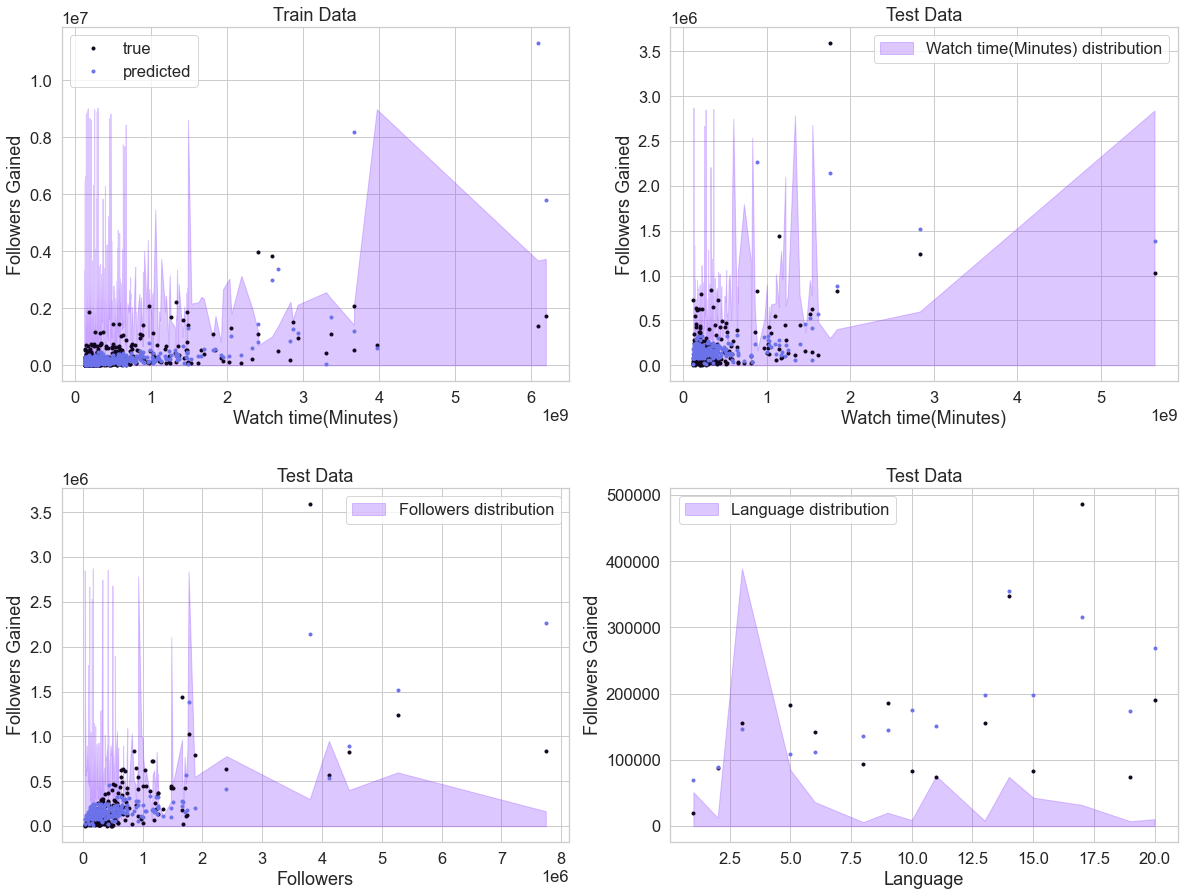

In [116]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

plot_obs_pred(
    df=df_train,
    feature="Watch time(Minutes)",
    weight="Stream time(minutes)",
    true="Followers gained",
    predicted=pr.predict(X_t_ss),
    y_label="Followers Gained",
    title="Train Data",
    ax=ax[0, 0],
)

plot_obs_pred(
    df=df_test,
    feature="Watch time(Minutes)",
    weight="Stream time(minutes)",
    true="Followers gained",
    predicted=pr.predict(X_test_ss),
    y_label="Followers Gained",
    title="Test Data",
    ax=ax[0, 1],
    fill_legend=True
)

plot_obs_pred(
    df=df_test,
    feature="Followers",
    weight="Stream time(minutes)",
    true="Followers gained",
    predicted=pr.predict(X_test_ss),
    y_label="Followers Gained",
    title="Test Data",
    ax=ax[1, 0],
    fill_legend=True
)

plot_obs_pred(
    df=df_test,
    feature="Language",
    weight="Stream time(minutes)",
    true="Followers gained",
    predicted=pr.predict(X_test_ss),
    y_label="Followers Gained",
    title="Test Data",
    ax=ax[1, 1],
    fill_legend=True
)

plt.savefig("../../reports/figures/Poisson_Model_performances.png", bbox_inches='tight', dpi=400)
plt.show()